## Audience Rating using Rotten Tomatoes Movie review Data

### Problem Statement:

* In this project,Demonstrated the accuracy of the audience rating system using available movie data. The dataset includes several attributes such as movie title, movie info, rating, genre, directors, writers, cast, in-theaters date, on-streaming date, runtime, and studio name, among others. With columns like tomatometer rating, audience rating, and critics consensus, discrepancies between critic and audience opinions often arise.
* The project will explore the relationship between movie attributes (like genre, cast, and runtime) and the audience's perception, helping to understand how these factors affect ratings and proposing strategies to address biases and improve overall accuracy.

### Attribute Information :

1. <span style = "color: Black; font-weight:Bold">movie_title:</span> The title of the movie.

2. <span style = "color: Black; font-weight:Bold">movie_info::</span>movie_info: Brief description or summary of the movie.

3. <span style = "color: Black; font-weight:Bold">critics_consensus:</span>critics_consensus: A summary or consensus of the critics’ reviews.


4. <span style = "color: Black; font-weight:Bold">rating:</span> rating: The age rating of the movie 

5. <span style = "color: Black; font-weight:Bold">movie_title:</span>genre: The genre or categories the movie belongs to story

6. <span style = "color: Black; font-weight:Bold">directors:</span> directors: The names of the directors of the movie.

7. <span style = "color: Black; font-weight:Bold">writers:</span> writers: The names of the writers of the movie.

8. <span style = "color: Black; font-weight:Bold">cast: </span>cast: The list of actors or cast members in the movie.

9. <span style = "color: Black; font-weight:Bold">in_theaters_date:</span>in_theaters_date: The date the movie was released in theaters.

10. <span style = "color: Black; font-weight:Bold">on_streaming_date:</span> on_streaming_date: The date the movie was made available for streaming.

11. <span style = "color: Black; font-weight:Bold">runtime_in_minutes:</span>runtime_in_minutes: The total duration of the movie in minutes.

12. <span style = "color: Black; font-weight:Bold">studio_name:</span> studio_name: The name of the studio that produced the movie.

13. <span style = "color: Black; font-weight:Bold">tomatometer_status:</span> tomatometer_status: Indicates the overall status of the movie on Rotten Tomatoes 

14. <span style = "color: Black; font-weight:Bold">tomatometer_rating:</span> tomatometer_rating: The percentage score given by critics based on their reviews.

15. <span style = "color: Black; font-weight:Bold">tomatometer_count:</span> tomatometer_count: The number of critic reviews that contributed to the Tomatometer rating.

16. <span style = "color: Black; font-weight:Bold">audience_rating:</span>audience_rating: The percentage score given by the audience based on their reviews.

#### Importing Basic Libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [2]:
#for colab
#from google.colab import drive
#drive.mount('/content/drive')
#file_path = '/content/drive/My Drive/My projects/Zoho-project/Rotten_Tomatoes_Movies3.xls'
#data=pd.read_excel(file_path)
#data

In [4]:

data=pd.read_excel('Rotten_Tomatoes_Movies3.xls')

NameError: name 'pd' is not defined

In [4]:
#information of all Features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         16638 non-null  object        
 1   movie_info          16614 non-null  object        
 2   critics_consensus   8309 non-null   object        
 3   rating              16638 non-null  object        
 4   genre               16621 non-null  object        
 5   directors           16524 non-null  object        
 6   writers             15289 non-null  object        
 7   cast                16354 non-null  object        
 8   in_theaters_date    15823 non-null  datetime64[ns]
 9   on_streaming_date   16636 non-null  datetime64[ns]
 10  runtime_in_minutes  16483 non-null  float64       
 11  studio_name         16222 non-null  object        
 12  tomatometer_status  16638 non-null  object        
 13  tomatometer_rating  16638 non-null  int64     

In [5]:
# Checking for null
data.isnull().sum()

movie_title              0
movie_info              24
critics_consensus     8329
rating                   0
genre                   17
directors              114
writers               1349
cast                   284
in_theaters_date       815
on_streaming_date        2
runtime_in_minutes     155
studio_name            416
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
audience_rating        252
dtype: int64

In [6]:
data.shape

(16638, 16)

In [7]:
# Dropping 'critics_consensus' for cantains lot of null values 
data.drop('critics_consensus', axis=1, inplace=True)

In [8]:
# Feature Engineering (example)
data['release_date'] = pd.to_datetime(data['in_theaters_date']).dt.day
data['release_month'] = pd.to_datetime(data['in_theaters_date']).dt.month
data['release_year'] = pd.to_datetime(data['in_theaters_date']).dt.year

data['Streaming_date'] = pd.to_datetime(data['on_streaming_date']).dt.day
data['Streaming_month'] = pd.to_datetime(data['on_streaming_date']).dt.month
data['Streaming_year'] = pd.to_datetime(data['on_streaming_date']).dt.year

data.drop(columns=['in_theaters_date'], inplace=True)
data.drop(columns=['on_streaming_date'], inplace=True)


In [3]:
#Dropping null values
data.dropna(axis=0, inplace=True)

NameError: name 'data' is not defined

In [10]:
data.shape

(14090, 19)

In [11]:
# finding Dublicate values
data.duplicated().sum()

0

In [12]:
# Checking For Null Values
data.isnull().sum().sort_values()

movie_title           0
Streaming_date        0
release_year          0
release_month         0
release_date          0
audience_rating       0
tomatometer_count     0
tomatometer_rating    0
Streaming_month       0
tomatometer_status    0
runtime_in_minutes    0
cast                  0
writers               0
directors             0
genre                 0
rating                0
movie_info            0
studio_name           0
Streaming_year        0
dtype: int64

In [13]:
data

,movie_title,movie_info,rating,genre,directors,writers,cast,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,release_date,release_month,release_year,Streaming_date,Streaming_month,Streaming_year
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",83.0,20th Century Fox,Rotten,49,144,53.0,12.0,2.0,2010.0,29.0,6.0,2010.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,30.0,4.0,2010.0,19.0,10.0,2010.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",118.0,Waner Bros.,Fresh,68,22,53.0,5.0,10.0,1979.0,27.0,8.0,1997.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",95.0,Criterion Collection,Certified Fresh,100,51,97.0,13.0,4.0,1957.0,6.0,3.0,2001.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",127.0,Disney,Fresh,89,27,74.0,1.0,1.0,1954.0,20.0,5.0,2003.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16632,Zoom,Former superhero Jack is called back to work t...,PG,"Action & Adventure, Comedy, Kids & Family",Peter Hewitt,"Adam Rifkin, David Berenbaum","Tim Allen, Courteney Cox, Chevy Chase, Spencer...",88.0,Sony Pictures Entertainment,Rotten,3,66,33.0,11.0,8.0,2006.0,2.0,9.0,2007.0
16633,Zoot Suit,"Based on a 1940s Los Angeles murder trial, thi...",R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",104.0,MCA Universal Home Video,Rotten,56,9,74.0,2.0,10.0,1981.0,27.0,5.0,2003.0
16634,Zootopia,The modern mammal metropolis of Zootopia is a ...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",108.0,Walt Disney Animation Studios,Certified Fresh,97,279,92.0,4.0,3.0,2016.0,7.0,6.0,2016.0
16636,Zulu,"Filmed on a grand scale, Zulu is a rousing rec...",PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",139.0,Paramount Pictures,Fresh,95,21,91.0,17.0,6.0,1964.0,2.0,2.0,2001.0


## Exploratory Data anlaysis


### Univariate Analysis

Univariate analysis involves  <span style = "color: Red; font-weight:bold">analyzing a single column or feature</span>. The type of analysis depends on whether the column is categorical or numerical.
- analysing a single column


#### Categorical Columns in the data:

- <span style = "color: black; font-weight:bold">Frequency Table: </span>To count the occurrences of each category.
- <span style = "color: black; font-weight:bold">Bar plot: </span>  To visualize the count of each category.
- <span style = "color: black; font-weight:bold">Count plot: </span> To show the frequency or count of each category.

In [14]:
num_columns = data[['rating', 'runtime_in_minutes', 'tomatometer_status', 'tomatometer_rating', 
                'tomatometer_count', 'audience_rating', 'release_date', 'release_month', 
                'release_year', 'Streaming_date', 'Streaming_month', 'Streaming_year',]]

### Sweet Viz 
- Sweetviz is a Python library that generates beautiful, high-density visualizations to quickly analyze and compare datasets. 

In [15]:
import sweetviz as sv
report = sv.analyze(num_columns)


                                             |                                             | [  0%]   00:00 ->…

In [16]:
# Show the report in the browser
report.show_html("Audience_rating_Report.html")

Report Audience_rating_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


rating
R         5650
NR        3299
PG-13     2672
PG        1851
G          580
NC17        34
PG-13)       3
R)           1
Name: count, dtype: int64


Text(0.5, 1.0, ' Ratings\xa0Counts')

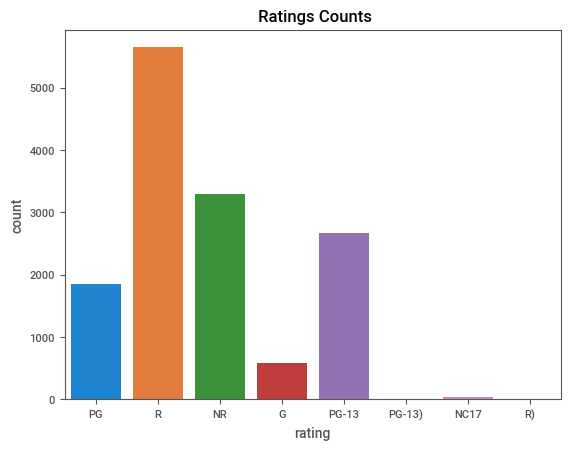

In [17]:
# count of highest rated ratings
print(data['rating'].value_counts())
sns.countplot(data=data, x='rating')
plt.title(' Ratings Counts')

tomatometer_status
Rotten             6468
Fresh              4969
Certified Fresh    2653
Name: count, dtype: int64


Text(0.5, 1.0, 'Count  of Fresh, Certified Fresh and\xa0Rotten\xa0Movies')

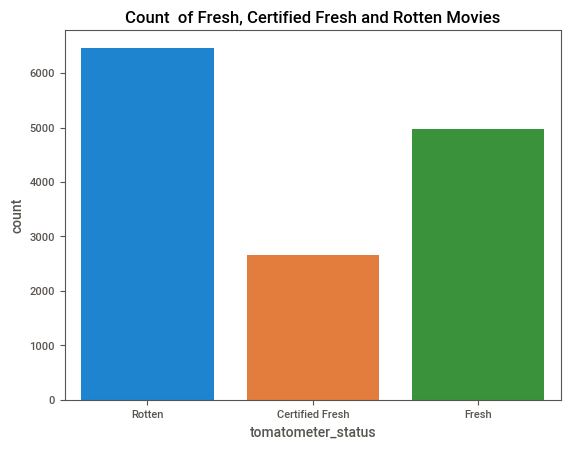

In [18]:
#Count of Fresh, Certified Fresh and Rotten Movies
print(data['tomatometer_status'].value_counts())
sns.countplot(data=data, x='tomatometer_status')
plt.title('Count  of Fresh, Certified Fresh and Rotten Movies')


In [19]:
# Highest runtime movie in the data
Highest_runtime=data[data["runtime_in_minutes"] == data["runtime_in_minutes"].max()][["runtime_in_minutes", "movie_title"]]
Highest_runtime

,runtime_in_minutes,movie_title
13539,2000.0,Terror Tract


In [20]:
# Lowest runtime movie in the data
Lowest_runtime=data[data["runtime_in_minutes"] == data["runtime_in_minutes"].min()][["runtime_in_minutes", "movie_title"]]
Lowest_runtime

,runtime_in_minutes,movie_title
323,1.0,The Border
1017,1.0,The Prophecy
3039,1.0,The Barbarian Invasions (Les Invasions barbares)
7019,1.0,Halloween - The Curse of Michael Myers (Hallow...
7248,1.0,Hellraiser: Deader
7249,1.0,Hellraiser: Hellseeker
7250,1.0,Hellraiser: Hellworld
11986,1.0,Rory O'Shea Was Here


In [21]:
# Count of most directors for a movie in the data
def count_directors(directors):
    return len(directors.split(','))

data['no.of.directors'] = data['directors'].apply(count_directors)
most_directors_movie = data[data['no.of.directors'] == data['no.of.directors'].max()]

most_directors_movie

,movie_title,movie_info,rating,genre,directors,writers,cast,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,release_date,release_month,release_year,Streaming_date,Streaming_month,Streaming_year,no.of.directors
10976,Paris Je T'aime,Twenty acclaimed filmmakers from around the wo...,R,"Art House & International, Drama, Romance","Christoffer Boe, Olivier Assayas, Fr√©d√©ric A...","Bruno Podalyd√®s, Paul Mayeda Berges, Gurinder...","Juliette Binoche, Steve Buscemi, Sergio Castel...",120.0,First Look Pictures,Certified Fresh,87,112,84.0,4.0,5.0,2007.0,13.0,11.0,2007.0,22


In [22]:
# Count of most casted  movie in the data
def count_cast(cast):
    return len(cast.split(','))

data['most_cast'] = data['cast'].apply(count_cast)
most_cast = data[data['most_cast'] == data['most_cast'].max()]

most_cast

,movie_title,movie_info,rating,genre,directors,writers,cast,runtime_in_minutes,studio_name,tomatometer_status,...,tomatometer_count,audience_rating,release_date,release_month,release_year,Streaming_date,Streaming_month,Streaming_year,no.of.directors,most_cast
912,Malcolm X,Writer-director Spike Lee's epic portrayal of ...,PG-13,Drama,Spike Lee,"Spike Lee, Arnold Perl","Denzel Washington, Angela Bassett, Al Freeman ...",201.0,Warner Bros.,Certified Fresh,...,57,91.0,18.0,11.0,1992.0,18.0,1.0,2000.0,1,306


studio_name
Paramount Pictures                  473
Warner Bros. Pictures               472
Universal Pictures                  457
20th Century Fox                    404
IFC Films                           355
Sony Pictures Home Entertainment    346
Warner Home Video                   338
MGM                                 246
MGM Home Entertainment              241
Sony Pictures Classics              238
Name: count, dtype: int64


Text(0.5, 1.0, 'studio  Counts')

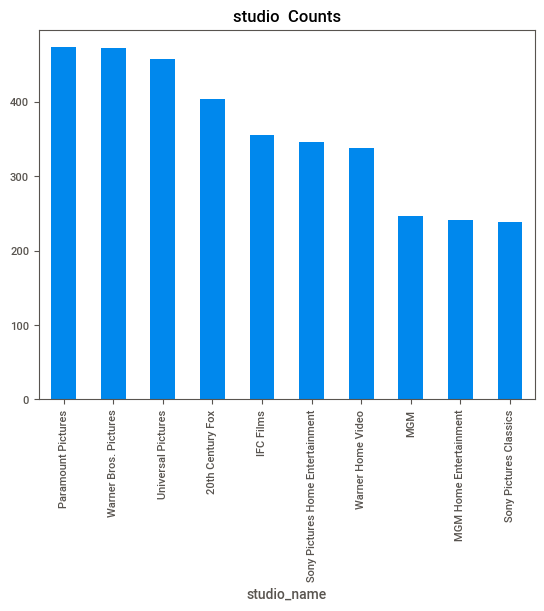

In [23]:
#Number of Movies Produced by top 10 Company
print(data['studio_name'].value_counts()[:10])
data['studio_name'].value_counts()[:10].plot(kind='bar')
plt.title('studio  Counts')

Year with most number of movies:  2014.0
Year with least number of movies:  1914.0


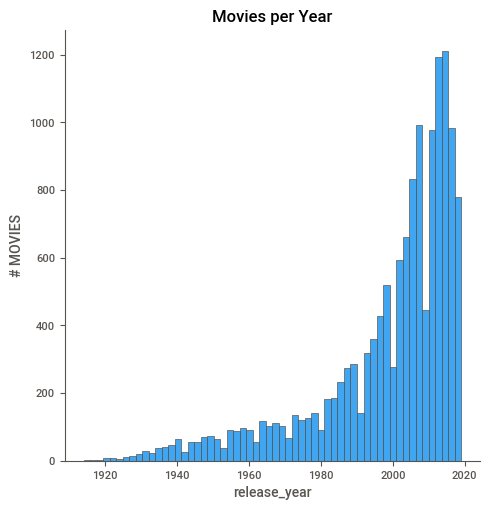

In [24]:
# Count of movie released per year
sns.displot(data=data, x='release_year')
plt.ylabel('# MOVIES')
plt.title('Movies per Year')
print('Year with most number of movies: ', data['release_year'].value_counts().index[0])
print('Year with least number of movies: ', data['release_year'].value_counts().index[-1])

Text(0, 0.5, 'Counts')

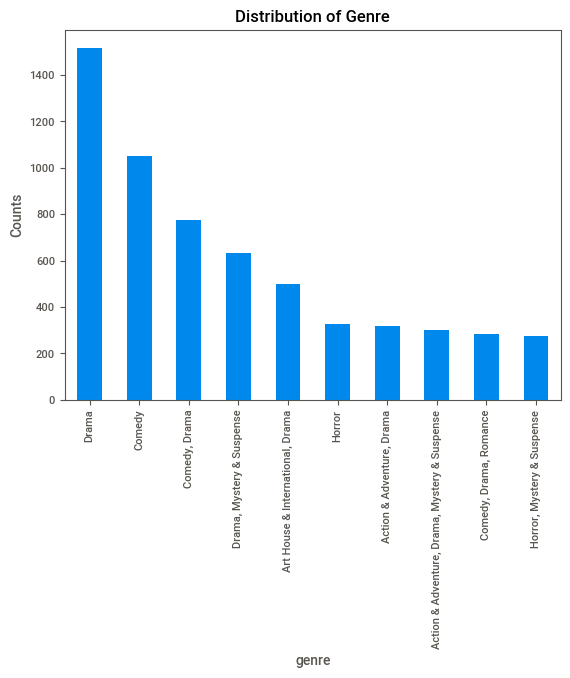

In [25]:
# count of Top 10 movie genre in a data
data['genre'].value_counts()[:10].plot(kind='bar')
plt.title('Distribution of Genre')
plt.ylabel('Counts')

In [26]:
#converting categorical to numerical values for least unique value categorical featuresin the data 
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data[['tomatometer_status', 'rating']] = data[['tomatometer_status', 'rating']].apply(label_encoder.fit_transform)

print(data['tomatometer_status'].value_counts())
print(data['rating'].value_counts())

tomatometer_status
2    6468
1    4969
0    2653
Name: count, dtype: int64
rating
6    5650
2    3299
4    2672
3    1851
0     580
1      34
5       3
7       1
Name: count, dtype: int64


In [27]:
data.describe()

,rating,runtime_in_minutes,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,release_date,release_month,release_year,Streaming_date,Streaming_month,Streaming_year,no.of.directors,most_cast
count,14090.000000,14090.000000,14090.000000,14090.000000,14090.000000,14090.00000,14090.000000,14090.000000,14090.000000,14090.000000,14090.000000,14090.000000,14090.000000,14090.000000
mean,4.030873,103.646842,1.270759,58.903052,61.854365,60.07885,14.557630,6.502555,1998.541945,15.272676,6.447055,2007.580696,1.122569,27.640667
std,1.830948,25.548225,0.757673,28.528839,68.860785,20.34867,9.121531,3.522943,19.736686,8.815602,3.420274,6.356441,0.520386,20.719323
min,0.000000,1.000000,0.000000,0.000000,5.000000,0.00000,1.000000,1.000000,1914.000000,1.000000,1.000000,1935.000000,1.000000,1.000000
25%,2.000000,91.000000,1.000000,36.000000,14.000000,44.00000,7.000000,3.000000,1991.000000,7.000000,3.000000,2002.000000,1.000000,12.000000
50%,4.000000,100.000000,1.000000,63.000000,32.000000,62.00000,15.000000,7.000000,2005.000000,15.000000,6.000000,2007.000000,1.000000,22.000000
75%,6.000000,112.000000,2.000000,84.000000,88.000000,77.00000,22.000000,10.000000,2013.000000,23.000000,9.000000,2013.000000,1.000000,38.000000
max,7.000000,2000.000000,2.000000,100.000000,497.000000,100.00000,31.000000,12.000000,2019.000000,31.000000,12.000000,2019.000000,22.000000,306.000000


### Multivariate Analysis

Multivariate analysis involves  <span style = "color: black; font-weight:bold">Analyzing more than two columns simultaneously</span>. This can get complex depending on the number of columns and their types.

- analysing all the columns at once  

#### Mixed Types (Numerical and Categorical):

- <span style = "color: black; font-weight:bold">Heatmap: </span> To show correlations between numerical variables.
- <span style = "color: black; font-weight:bold">Correlation Matrix: </span> To visualize the correlation between all numerical columns.

<Axes: >

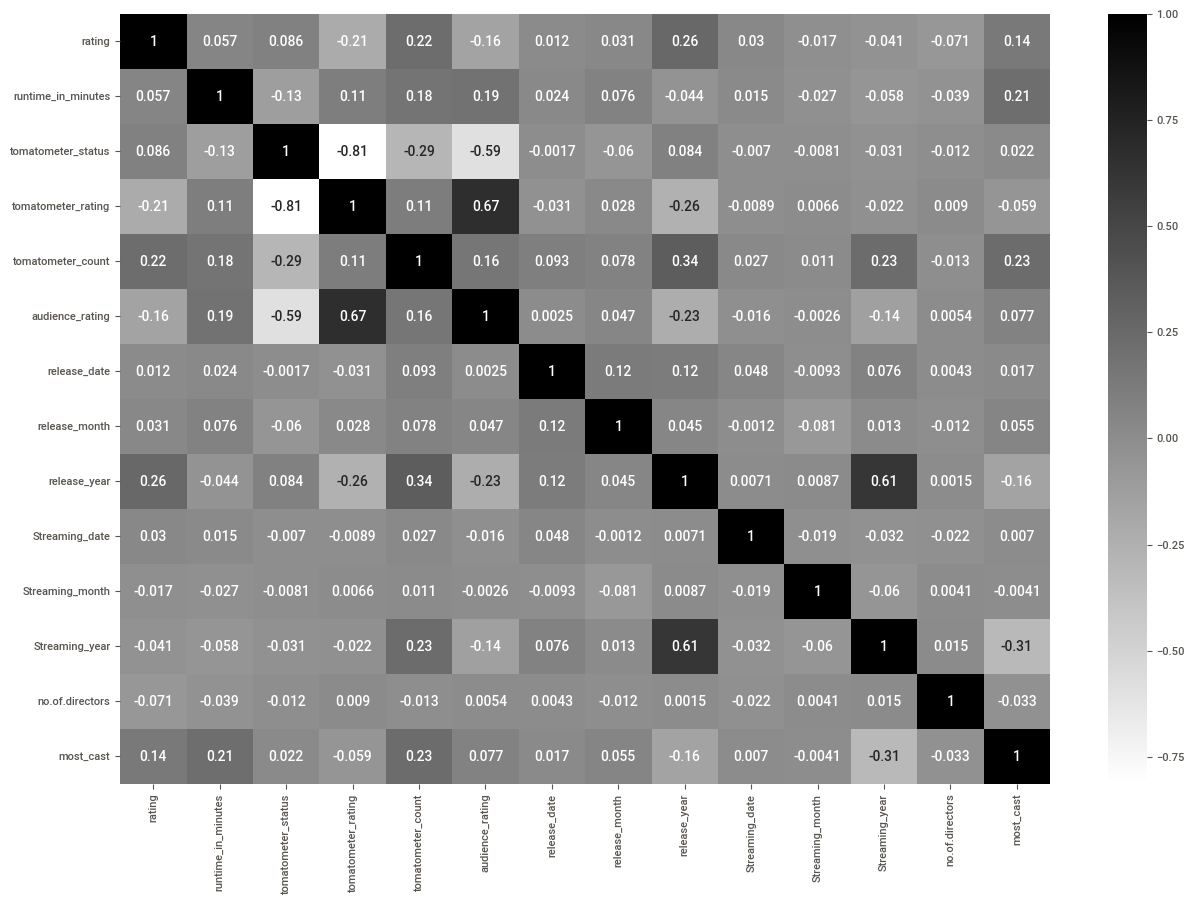

In [28]:
# checking Correlation between the features
corr =data.select_dtypes('number').corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='binary')

In [29]:
#Correlation with the target value "audience_rating"
data.select_dtypes('number').corr()['audience_rating'].sort_values(ascending=False)

audience_rating       1.000000
tomatometer_rating    0.668687
runtime_in_minutes    0.186683
tomatometer_count     0.156873
most_cast             0.076820
release_month         0.047499
no.of.directors       0.005388
release_date          0.002548
Streaming_month      -0.002585
Streaming_date       -0.015541
Streaming_year       -0.136502
rating               -0.158372
release_year         -0.232641
tomatometer_status   -0.590790
Name: audience_rating, dtype: float64

#### identifying outliers using Boxplot

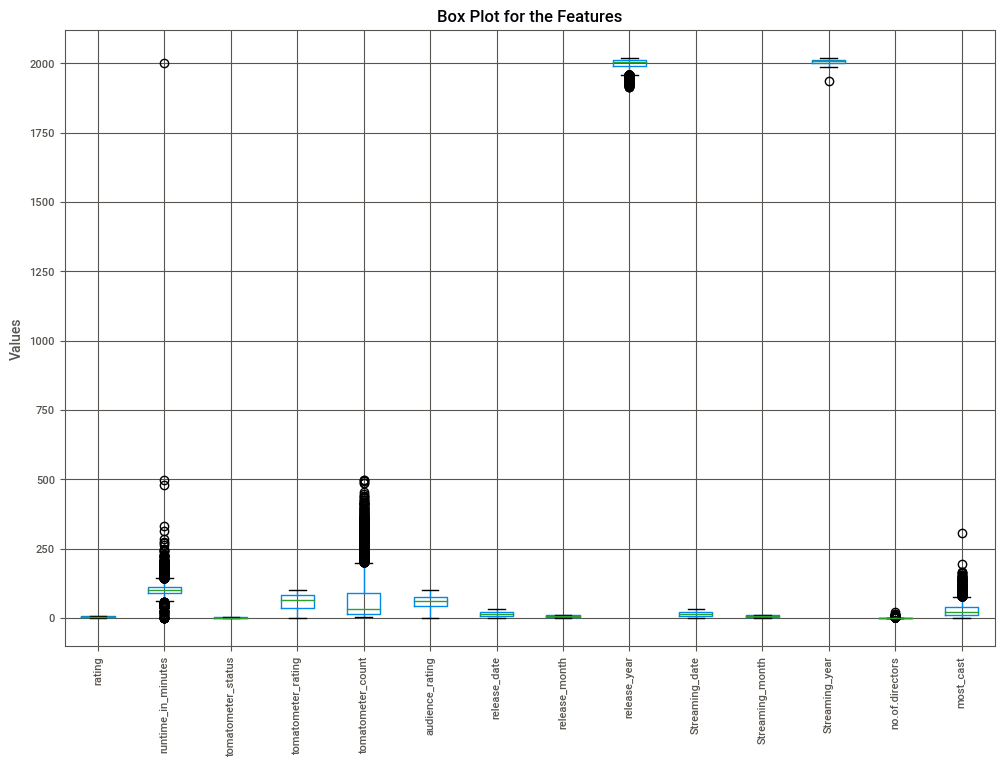

In [30]:
# identifying outliers using Boxplot
# List of columns to analyze
columns = [ 'rating', 'runtime_in_minutes', 'tomatometer_status',
       'tomatometer_rating', 'tomatometer_count', 'audience_rating',
       'release_date', 'release_month', 'release_year', 'Streaming_date',
       'Streaming_month', 'Streaming_year', 'no.of.directors', 'most_cast']

plt.figure(figsize=(12,8))
data[columns].boxplot()
plt.title('Box Plot for the Features')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.show()

#### Checking For Outliers in the data by Z_SCORE

In [31]:
from scipy.stats import zscore

# List of columns to analyze
columns =[ 'rating', 'runtime_in_minutes', 'tomatometer_status','tomatometer_rating', 'tomatometer_count', 
          'audience_rating','release_date', 'release_month', 'release_year', 'Streaming_date',
          'Streaming_month', 'Streaming_year', 'no.of.directors', 'most_cast']
threshold = 3 

In [32]:
# Analyze each column with percentage of Outliers
for col in columns:
    
    z_scores = zscore(data[col])  
    outliers = data[abs(z_scores) > threshold]
    percentage_outliers = (len(outliers) / len(data)) * 100
    
    print(f"Feature: {col}")
    print(f"Percentage of outliers: {percentage_outliers:.2f}%\n")

Feature: rating
Percentage of outliers: 0.00%

Feature: runtime_in_minutes
Percentage of outliers: 0.74%

Feature: tomatometer_status
Percentage of outliers: 0.00%

Feature: tomatometer_rating
Percentage of outliers: 0.00%

Feature: tomatometer_count
Percentage of outliers: 1.70%

Feature: audience_rating
Percentage of outliers: 0.00%

Feature: release_date
Percentage of outliers: 0.00%

Feature: release_month
Percentage of outliers: 0.00%

Feature: release_year
Percentage of outliers: 1.74%

Feature: Streaming_date
Percentage of outliers: 0.00%

Feature: Streaming_month
Percentage of outliers: 0.00%

Feature: Streaming_year
Percentage of outliers: 0.04%

Feature: no.of.directors
Percentage of outliers: 1.49%

Feature: most_cast
Percentage of outliers: 1.50%



In [33]:
for col in columns:
    Q1 = data[col].quantile(0.25)  # 1st quartile
    Q3 = data[col].quantile(0.75)  # 3rd quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Replace outliers with upper or lower limit
    data[col] = data[col].mask(data[col] < lower_limit, lower_limit)
    data[col] = data[col].mask(data[col] > upper_limit, upper_limit)


In [34]:
# Rechecking the columns after handling outliers
for col in columns:
    
    z_scores = zscore(data[col])  
    outliers = data[abs(z_scores) > threshold]
    percentage_outliers = (len(outliers) / len(data)) * 100
    
    print(f"Feature: {col}")
    print(f"Percentage of outliers: {percentage_outliers:.2f}%\n")

Feature: rating
Percentage of outliers: 0.00%

Feature: runtime_in_minutes
Percentage of outliers: 0.00%

Feature: tomatometer_status
Percentage of outliers: 0.00%

Feature: tomatometer_rating
Percentage of outliers: 0.00%

Feature: tomatometer_count
Percentage of outliers: 0.00%

Feature: audience_rating
Percentage of outliers: 0.00%

Feature: release_date
Percentage of outliers: 0.00%

Feature: release_month
Percentage of outliers: 0.00%

Feature: release_year
Percentage of outliers: 0.00%

Feature: Streaming_date
Percentage of outliers: 0.00%

Feature: Streaming_month
Percentage of outliers: 0.00%

Feature: Streaming_year
Percentage of outliers: 0.04%

Feature: no.of.directors
Percentage of outliers: 0.00%

Feature: most_cast
Percentage of outliers: 0.00%



In [35]:
feature_to_scale= data.drop(columns=['movie_title', 'movie_info', 'genre', 'directors', 
                                     'writers', 'cast','studio_name'])


In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(feature_to_scale)
scaled_features_df = pd.DataFrame(x, columns=feature_to_scale.columns)
scaled_features_df


,rating,runtime_in_minutes,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,release_date,release_month,release_year,Streaming_date,Streaming_month,Streaming_year,no.of.directors,most_cast
0,-0.563047,-1.213324,0.962508,-0.347137,1.453335,-0.347890,-0.280405,-1.278112,0.608269,1.557218,-0.130712,0.381662,0.0,2.653826
1,1.075507,-0.786200,-1.677246,0.949843,1.385287,0.192705,1.693018,-0.710384,0.608269,0.422825,1.038826,0.381662,0.0,-1.016190
2,1.075507,0.922296,-0.357369,0.318880,-0.622116,-0.347890,-1.047847,0.992797,-1.165418,1.330339,0.454057,-1.672222,0.0,1.004978
3,-1.109231,-0.481111,-1.677246,1.440592,-0.128771,1.814490,-0.170770,-0.710384,-2.366947,-1.051886,-1.007866,-1.040258,0.0,-0.590681
4,-2.201600,1.471456,-0.357369,1.055003,-0.537057,0.684155,-1.486385,-1.561975,-2.366947,0.536264,-0.423096,-0.724275,0.0,-0.590681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14085,-0.563047,-0.908235,0.962508,-1.959597,0.126407,-1.330790,-0.390039,0.425070,0.379406,-1.505643,0.746442,-0.092311,0.0,0.313526
14086,1.075507,0.068048,0.962508,-0.101762,-0.843271,0.684155,-1.376751,0.992797,-1.050986,1.330339,-0.423096,-0.724275,0.0,1.217733
14087,-0.563047,0.312119,-1.677246,1.335431,2.388989,1.568765,-1.157482,-0.994248,0.951563,-0.938446,-0.130712,1.329609,0.0,0.366715
14088,-0.563047,2.203668,-0.357369,1.265324,-0.639128,1.519620,0.267768,-0.142657,-2.023653,-1.505643,-1.300250,-1.040258,0.0,0.313526


### Defining Features and Target

In [37]:
X = scaled_features_df.drop(columns=['audience_rating'])
y = scaled_features_df['audience_rating']

#### Feature Selection 

In [38]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [39]:
print(selection.feature_importances_)

[0.03624039 0.07303047 0.23338598 0.26645015 0.0530523  0.04364679
 0.04320402 0.05448424 0.04602338 0.04417349 0.05796394 0.
 0.04834484]


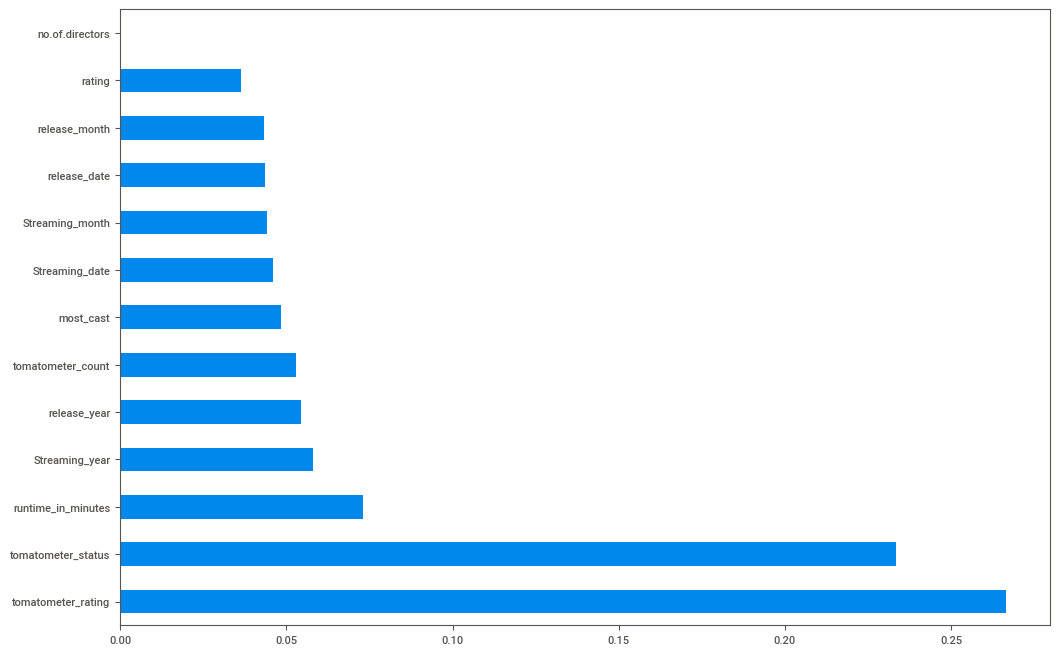

In [40]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [41]:
# dropping No.of.directors for less feature importance to the model
X = scaled_features_df.drop(columns=['audience_rating','no.of.directors'])
y = scaled_features_df['audience_rating']

In [42]:
X

,rating,runtime_in_minutes,tomatometer_status,tomatometer_rating,tomatometer_count,release_date,release_month,release_year,Streaming_date,Streaming_month,Streaming_year,most_cast
0,-0.563047,-1.213324,0.962508,-0.347137,1.453335,-0.280405,-1.278112,0.608269,1.557218,-0.130712,0.381662,2.653826
1,1.075507,-0.786200,-1.677246,0.949843,1.385287,1.693018,-0.710384,0.608269,0.422825,1.038826,0.381662,-1.016190
2,1.075507,0.922296,-0.357369,0.318880,-0.622116,-1.047847,0.992797,-1.165418,1.330339,0.454057,-1.672222,1.004978
3,-1.109231,-0.481111,-1.677246,1.440592,-0.128771,-0.170770,-0.710384,-2.366947,-1.051886,-1.007866,-1.040258,-0.590681
4,-2.201600,1.471456,-0.357369,1.055003,-0.537057,-1.486385,-1.561975,-2.366947,0.536264,-0.423096,-0.724275,-0.590681
...,...,...,...,...,...,...,...,...,...,...,...,...
14085,-0.563047,-0.908235,0.962508,-1.959597,0.126407,-0.390039,0.425070,0.379406,-1.505643,0.746442,-0.092311,0.313526
14086,1.075507,0.068048,0.962508,-0.101762,-0.843271,-1.376751,0.992797,-1.050986,1.330339,-0.423096,-0.724275,1.217733
14087,-0.563047,0.312119,-1.677246,1.335431,2.388989,-1.157482,-0.994248,0.951563,-0.938446,-0.130712,1.329609,0.366715
14088,-0.563047,2.203668,-0.357369,1.265324,-0.639128,0.267768,-0.142657,-2.023653,-1.505643,-1.300250,-1.040258,0.313526


### Splitting the Data for Train / Test

In [43]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### 1.RandomForestRegressor

In [44]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [45]:
y_pred = reg_rf.predict(X_test)

In [46]:
from sklearn import metrics

In [47]:
print('R2_score:', metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2_score: 0.5311445819707181
MAE: 0.5370031734245372
MSE: 0.4662506089459082
RMSE: 0.6828254600891125


### Hyper parameter Tuning - RandomForestRegressor

In [48]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

In [49]:
rf_model = RandomForestRegressor(random_state=42)

In [50]:
# Creating Random Grid for RandomForestRegressor
param_dist = {
    'n_estimators': randint(50, 500),  
    'max_depth': randint(3, 20),  
    'min_samples_split': randint(2, 20),  
    'min_samples_leaf': randint(1, 20), 
    'max_features': ['auto', 'sqrt', 'log2', None], 
    'bootstrap': [True, False],  
}

In [51]:
rf_random = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=100,  
    scoring='neg_mean_squared_error', 
    n_jobs=-1, 
    cv=5,  
    verbose=2,
    random_state=42
)

In [52]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000239368502D0>,
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002393685E890>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002393685D750>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000023936850950>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [53]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 12,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 9,
 'n_estimators': 223}

In [54]:
RF_pred= rf_random.predict(X_test)

In [55]:
print('R2_score:', metrics.r2_score(y_test, RF_pred))
print('MAE:', metrics.mean_absolute_error(y_test, RF_pred))
print('MSE:', metrics.mean_squared_error(y_test, RF_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, RF_pred)))

R2_score: 0.5488860553831391
MAE: 0.530310900620397
MSE: 0.44860770142250134
RMSE: 0.6697818312125982


In [56]:
RF_score=metrics.r2_score(y_test, RF_pred)
RF_accuracy =RF_score * 100

print(f"\033[1mAccuracy of Random Forest Regressor: {RF_accuracy:.2f}%\033[0m")

Accuracy of Random Forest Regressor: 54.89%


In [57]:
y_pred

array([-1.1961329 , -0.60246125,  1.077315  , ..., -0.05744315,
        0.58488206, -0.47320989])

### 2.GradientBoostingRegressor

In [58]:
from sklearn.ensemble import GradientBoostingRegressor

In [59]:
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)

GradientBoostingRegressor()

In [60]:
y_pred2 = gb.predict(X_test)

In [61]:
print('R2_score:', metrics.r2_score(y_test, y_pred2))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

R2_score: 0.5517738831704784
MAE: 0.524683388095103
MSE: 0.4457359174724782
RMSE: 0.6676345688117701


### Hyper Parameter Tuning -GradientBoostingRegressor

In [62]:
gbr_model = GradientBoostingRegressor(random_state=42)

In [63]:

param_dist = {
    'n_estimators': randint(50, 500), 
    'max_depth': randint(3, 15),  
    'learning_rate': uniform(0.01, 0.3), 
    'subsample': uniform(0.5, 0.5),  
    'min_samples_split': randint(2, 20),  
    'min_samples_leaf': randint(1, 20),  
    'max_features': ['auto', 'sqrt', 'log2', None],  
}

In [64]:
random_search = RandomizedSearchCV(
    estimator=gbr_model,
    param_distributions=param_dist,
    n_iter=100,  
    scoring='neg_mean_squared_error',  
    n_jobs=-1,  
    cv=5,  
    verbose=2,
    random_state=42
)

In [65]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000239368D5910>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000239368B59D0>,
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         No...
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000239368D70D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000239368A7710>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000239368D55D0>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [66]:
random_search.best_params_

{'learning_rate': 0.0356042394981304,
 'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_leaf': 15,
 'min_samples_split': 4,
 'n_estimators': 360,
 'subsample': 0.5691765462089007}

In [67]:
GB_pred= random_search.predict(X_test)

In [68]:
print('R2_score:', metrics.r2_score(y_test, GB_pred))
print('MAE:', metrics.mean_absolute_error(y_test, GB_pred))
print('MSE:', metrics.mean_squared_error(y_test, GB_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, GB_pred)))

R2_score: 0.5533179888055211
MAE: 0.5226464265521168
MSE: 0.44420039038900855
RMSE: 0.6664836009903083


In [69]:
GB_score=metrics.r2_score(y_test, GB_pred)
GB_accuracy =GB_score * 100

print(f"\033[1mAccuracy of Gradient Boosting Regressor: {GB_accuracy:.2f}%\033[0m")

Accuracy of Gradient Boosting Regressor: 55.33%


### 3. XGB_Regressor

In [70]:
from xgboost import XGBRegressor

In [71]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [72]:
y_pred3 = xgb.predict(X_test)

In [73]:
print('R2_score:', metrics.r2_score(y_test, y_pred3))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

R2_score: 0.5101975264542206
MAE: 0.5449503617084756
MSE: 0.48708128939584766
RMSE: 0.6979120928855207


### Hyper Parameter Tuning -  XGB_Regressor

In [74]:
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

In [75]:
param_dist = {
    'n_estimators': randint(50, 500), 
    'max_depth': randint(3, 15),  
    'learning_rate': uniform(0.01, 0.3),  
    'subsample': uniform(0.5, 0.5),  
    'colsample_bytree': uniform(0.5, 0.5),  
    'gamma': uniform(0, 1),  
    'reg_alpha': uniform(0, 1),  
    'reg_lambda': uniform(0, 1)  
}

In [76]:
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=100,  
    scoring='neg_mean_squared_error',  
    n_jobs=-1,  
    cv=5,  
    verbose=2,
    random_state=42
)

In [77]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002393689C050>,
                                        'reg_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002393560ED10>,
                                        'reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002393560F310>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002393689C550>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [78]:
random_search.best_params_

{'colsample_bytree': 0.8754355338957487,
 'gamma': 0.7545428740846823,
 'learning_rate': 0.040937160650779784,
 'max_depth': 3,
 'n_estimators': 418,
 'reg_alpha': 0.5052523724478571,
 'reg_lambda': 0.8264574661077416,
 'subsample': 0.6600248005153059}

In [79]:
XGB_pred= random_search.predict(X_test)

In [80]:
print('R2_score:', metrics.r2_score(y_test, XGB_pred))
print('MAE:', metrics.mean_absolute_error(y_test, XGB_pred))
print('MSE:', metrics.mean_squared_error(y_test, XGB_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,XGB_pred)))

R2_score: 0.5560491365244589
MAE: 0.5217292576032507
MSE: 0.44148441604359434
RMSE: 0.6644429366345874


In [81]:
XGB_score=metrics.r2_score(y_test, GB_pred)
XGB_accuracy =XGB_score * 100

print(f"\033[1mAccuracy of Xtreme Gradient Boosting Regressor: {XGB_accuracy:.2f}%\033[0m")

Accuracy of Xtreme Gradient Boosting Regressor: 55.33%


### 4.SVM - Regressor

In [82]:
from sklearn.svm import SVR


svr_param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['linear', 'rbf']
}

svr = SVR()

### HyperParameter Tuning - SVM_Regressor

In [83]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [84]:
svr_random = RandomizedSearchCV(
    estimator=svr,
    param_distributions=svr_param_grid,
    n_iter=10,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=2
)

In [85]:

# Fit the model
svr_random.fit(X_train_scaled, y_train)

# Best parameters and predictions
print("Best Parameters for SVR:", svr_random.best_params_)
SVR_pred = svr_random.best_estimator_.predict(X_test_scaled)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters for SVR: {'kernel': 'rbf', 'epsilon': 0.5, 'C': 1}


In [86]:

print('R2_score:', metrics.r2_score(y_test,SVR_pred))
print('MAE:', metrics.mean_absolute_error(y_test, SVR_pred))
print('MSE:', metrics.mean_squared_error(y_test, SVR_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,SVR_pred)))

R2_score: 0.5299604860398792
MAE: 0.5357931017004772
MSE: 0.46742812642267023
RMSE: 0.6836871553734721


In [87]:
SVR_score=metrics.r2_score(y_test,SVR_pred)
SVR_accuracy = SVR_score* 100

# Print the percentage accuracy
print(f"\033[1mAccuracy of Support Vector Regressor: {SVR_accuracy:.2f}%\033[0m")

Accuracy of Support Vector Regressor: 53.00%


### Comparing Accuracy of the Models

In [88]:
final_Accuracy= pd.DataFrame({'Models' :['RFG','GBR','XGBR','SVR'],
             'Accuracy':[RF_accuracy,GB_accuracy,XGB_accuracy,SVR_accuracy]})

<Axes: xlabel='Models', ylabel='Accuracy'>

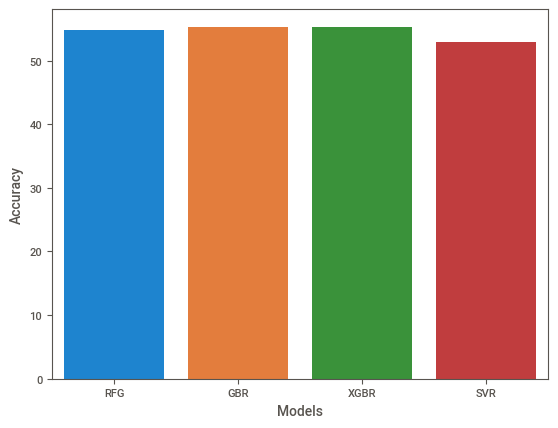

In [89]:
sns.barplot(x=final_Accuracy['Models'], y=final_Accuracy['Accuracy'])

#### Xtreme gradient boosting and Gradient Boosting  gaves a better accuracy 55.33% 

### Conclusion

 - In this project, the models achieved a moderate accuracy of 55% The correlation analysis shows that tomatometer_status has a significant negative correlation. Other numerical features, like runtime_in_minutes and tomatometer_count, have weak positive correlations, while features like release_year and rating show weak negative correlations.

- The presence of high-cardinality categorical data, such as movie_title, genre, and cast, poses a challenge as they introduce sparsity and complexity, especially with 7000+ unique values. These features may require advanced encoding techniques or feature reduction to contribute effectively to the model.

- performance might have been limited by the data's structure, weak feature relationships, and the challenges of handling high-cardinality categorical variables.

- Xtreme gradient boosting and Gradient Boosting  gaves a better accuracy 55.33% over another two models

- This project highlights the potential of ensemble techniques.<span style = "color: red; font-weight:bold"> but the models achieved a moderate accuracy of 55% </span>  

### Saving The Model

In [90]:
import pickle
# Saving the Model
xgbr_final = random_search .best_estimator_
filename = 'Audience_rating_reg_xgbr.pkl'
pickle.dump(xgbr_final, open(filename, 'wb'))

# Loading and Testing the Saved Model
loaded_model = pickle.load(open('Audience_rating_reg_xgbr.pkl', 'rb'))
y_prediction = loaded_model.predict(X_test)

In [91]:
y_prediction

array([-0.9832995 , -0.24835853,  0.98983157, ...,  0.15167986,
        0.50252324, -0.610207  ], dtype=float32)